# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [26]:
data.shape

(3864, 19)

In [27]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [28]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

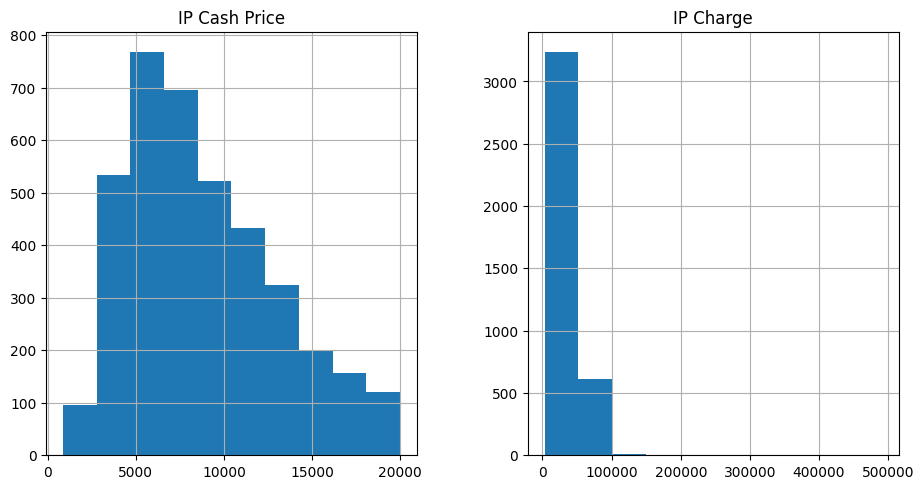

In [29]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

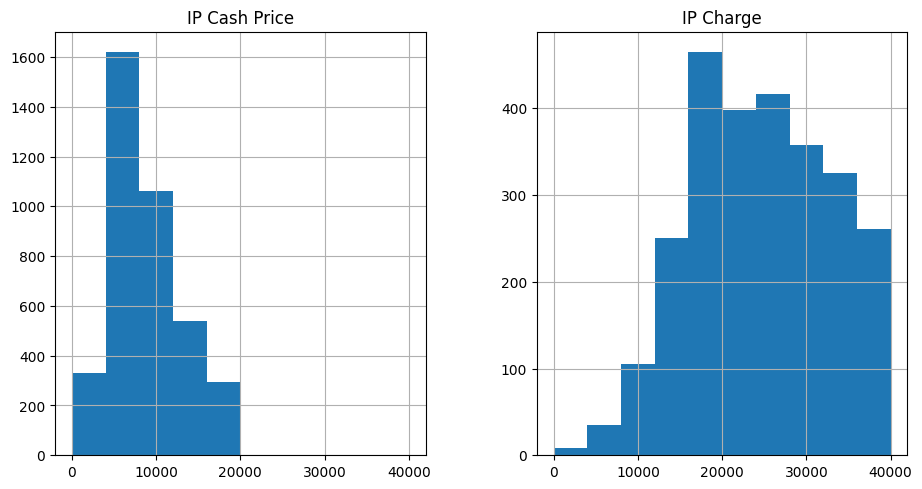

In [30]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [31]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:

1. IP Cash Price Histogram:

The distribution appears to be heavily skewed to the right (positive skewness).

The majority of the data points are concentrated around the lower values, between 0 and 10,000. There are significantly fewer data points as the price increases towards the right side of the histogram.

This suggests that most instances have a lower IP Cash Price, with a few instances having considerably higher values.

2. IP Charge Histogram:

This histogram also appears to be somewhat positively skewed, but it shows a wider spread of values compared to the IP Cash Price.

Most of the instances are concentrated around the range of 0 to 20,000, with a steady decline as the values increase.

There is a more gradual distribution compared to the first histogram, indicating a more even spread of charges up to 40,000.


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

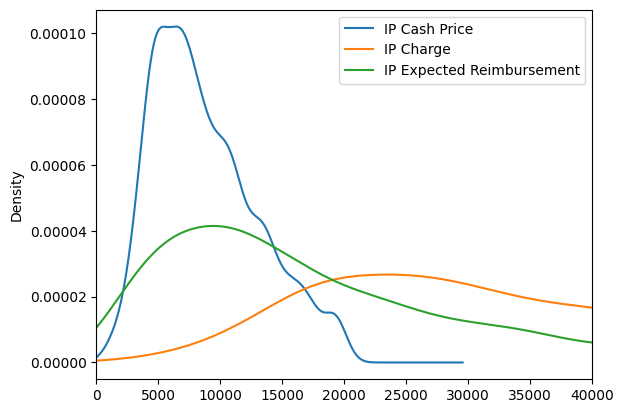

In [32]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:

1. IP Cash Price (Self-Pay):
The IP Cash Price (in blue) shows a steep peak at lower values, indicating that most cash prices are concentrated in the lower price range.
This aligns with the expectation that cash prices should generally be lower, as hospitals often provide discounted rates to patients paying out of pocket.
2. IP Charge (Hospital's Maximum Bill):
The IP Charge (in orange) curve is more spread out and flatter compared to the IP Cash Price. It peaks around a higher range and has a longer tail, suggesting that the maximum billable amount is often much higher than what self-paying patients would be charged.
This pattern implies that hospitals set higher charges for bills submitted to insurance companies compared to what they charge patients directly.
3. IP Expected Reimbursement (Contracted Amount):
The IP Expected Reimbursement (in green) falls somewhere between the IP Cash Price and the IP Charge curves. It peaks at a point higher than the cash price but lower than the charge, which is consistent with what you described as the contracted amount hospitals expect to receive from insurance companies.
This shows that the actual amount expected from insurers is higher than what a cash-paying patient would be charged but lower than the maximum billable amount.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [33]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [34]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


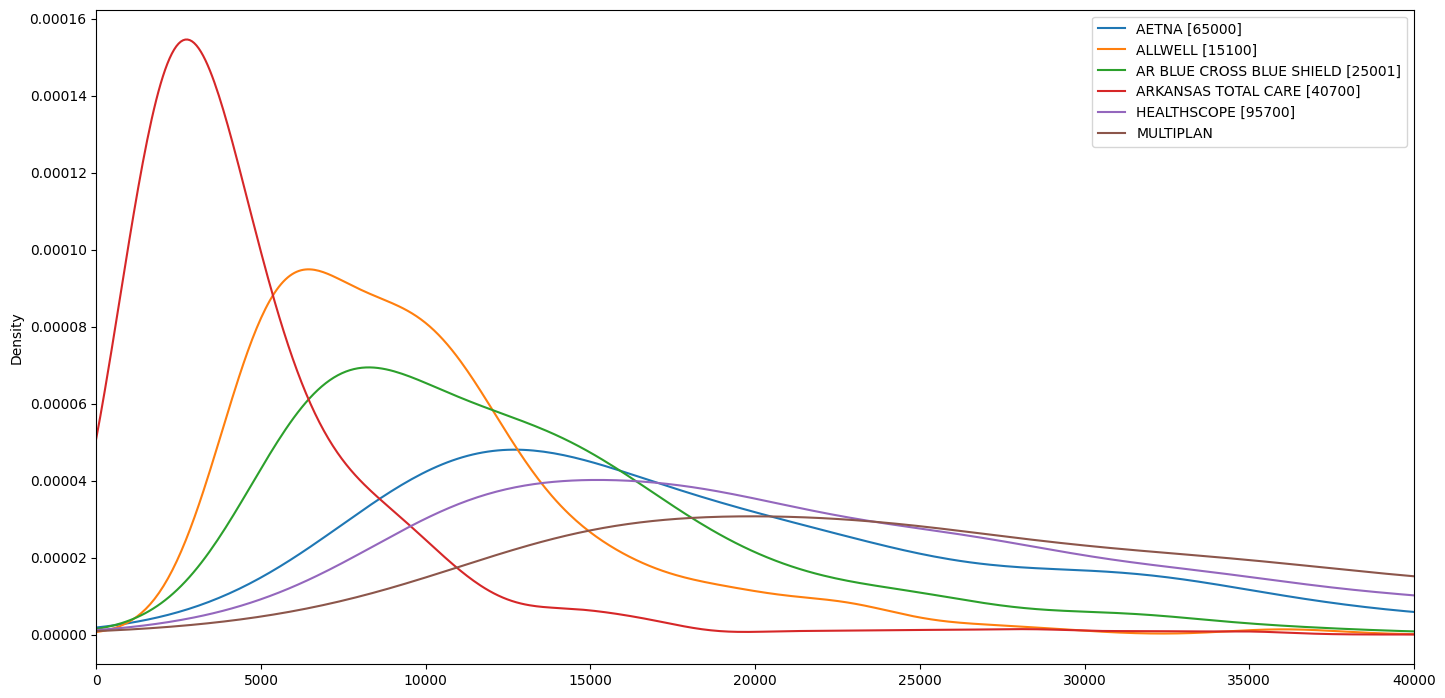

In [35]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:

Observations:
ALLWELL and ARKANSAS TOTAL CARE have peaks at lower reimbursement ranges (around 3,000–5,000), indicating these plans frequently offer lower payouts.
AR BLUE CROSS BLUE SHIELD, HEALTHSCOPE, and AETNA have peaks at higher ranges (around 10,000), reflecting higher typical reimbursements.
MULTIPLAN has a broader, flatter curve, indicating a wide distribution of reimbursement amounts.

Interpretation:
Plans with lower peaks (e.g., ARKANSAS TOTAL CARE) offer more frequent but smaller reimbursements, indicating stricter or lower-cost policies.
Higher peaks at larger values suggest plans like AETNA and HEALTHSCOPE may provide more generous coverage.
The KDE reflects differences in reimbursement strategies between providers, showing varied levels of payments across plans.


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

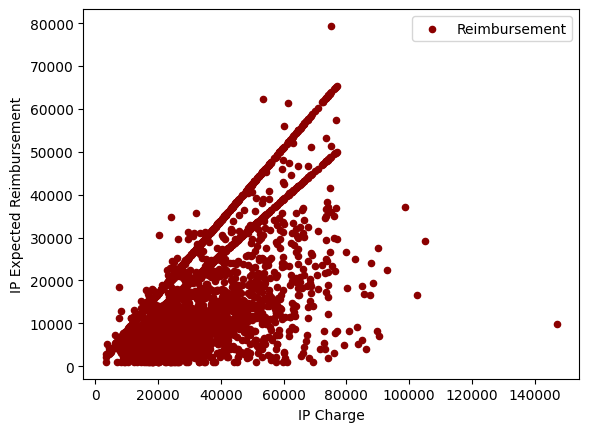

In [36]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

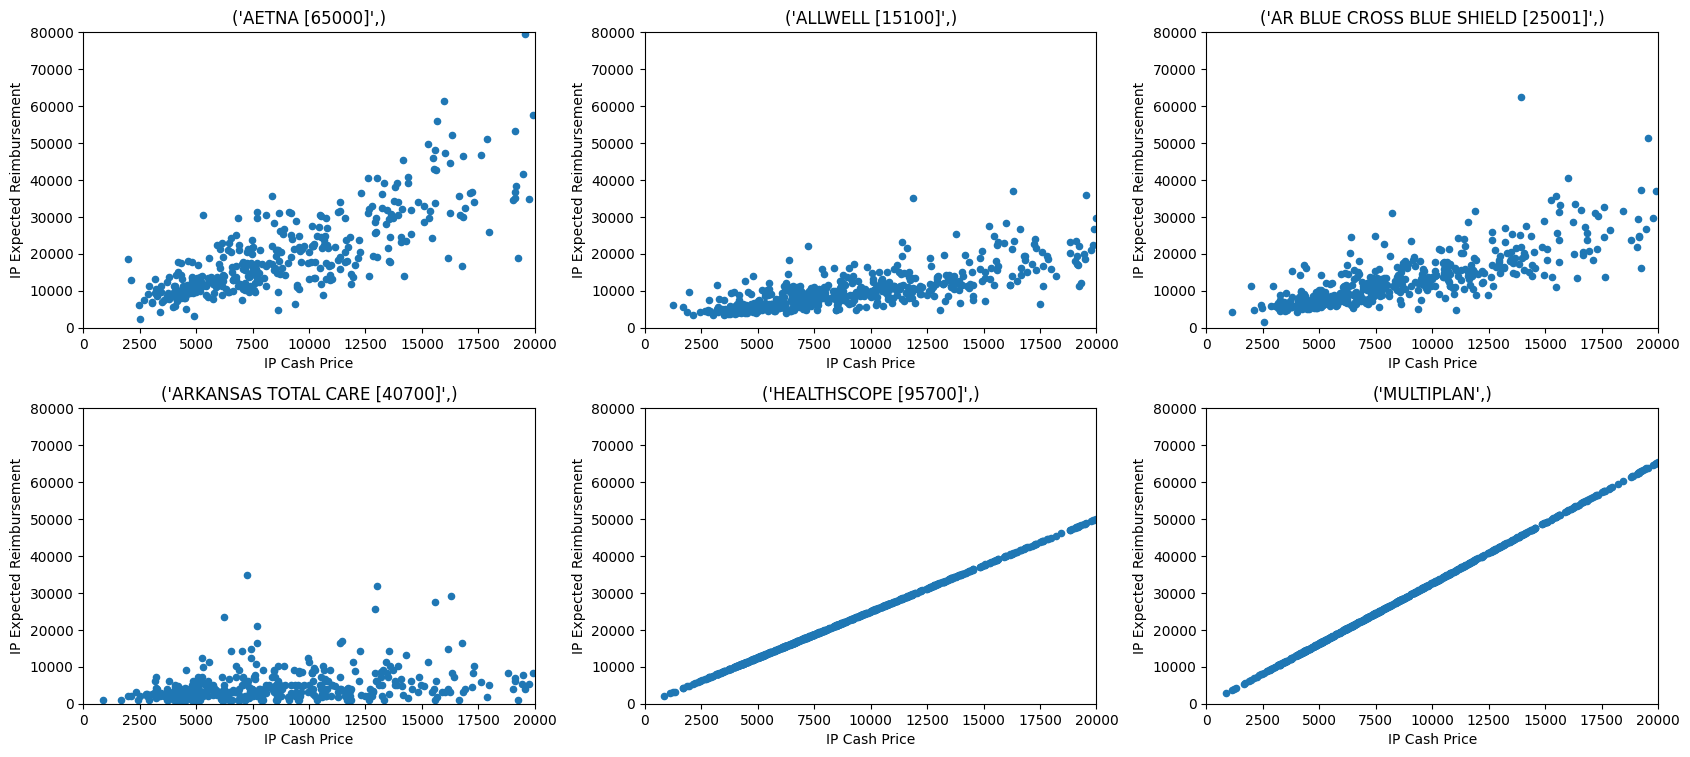

In [37]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

First Plot (Single Scatter Plot):
Title/Plot Information: This scatter plot relates "IP Charge" (Inpatient Charge) on the x-axis and "IP Expected Reimbursement" on the y-axis.
Observation: There seems to be a positive correlation between the inpatient charges and the expected reimbursement. As charges increase, expected reimbursement generally increases, but there are several outliers, especially around higher charge values. Some distinct vertical lines suggest that for certain charge amounts, reimbursement varies significantly.
Second Set of Plots (Multiple Scatter Plots by Payer):
These scatter plots represent the relationship between "IP Cash Price" and "IP Expected Reimbursement" across different insurance payers. Each plot corresponds to a specific payer.
AETNA:

There is a clear positive correlation between cash price and expected reimbursement, but with some variability for higher cash prices.
ALLWELL:

The correlation is weaker and more scattered compared to AETNA, especially for higher cash prices where the reimbursement remains low.
AR BLUE CROSS BLUE SHIELD:

The plot shows a positive trend, but there's a lot of variability, especially at mid-range cash prices.
ARKANSAS TOTAL CARE:

The correlation is weaker, with most reimbursements remaining low regardless of the cash price.
HEALTHSCOPE:

This plot shows a nearly perfect positive correlation, indicating a very direct relationship between cash price and expected reimbursement.
MULTIPLAN:

Similar to HEALTHSCOPE, the relationship between cash price and expected reimbursement is nearly linear, indicating a direct and consistent relationship between the two.


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [38]:
# Your code here to load data...
import pandas as pd

# Replace 'your_file.csv' with the name of your dataset
data = pd.read_csv('/content/GrandPrix_drivers_details_1950_to_2022.csv')

data.head()


,Pos,Driver,Nationality,Car,PTS,year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


<ipython-input-39-0a16207baf25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drivers, x='Driver', y='PTS', palette='viridis')


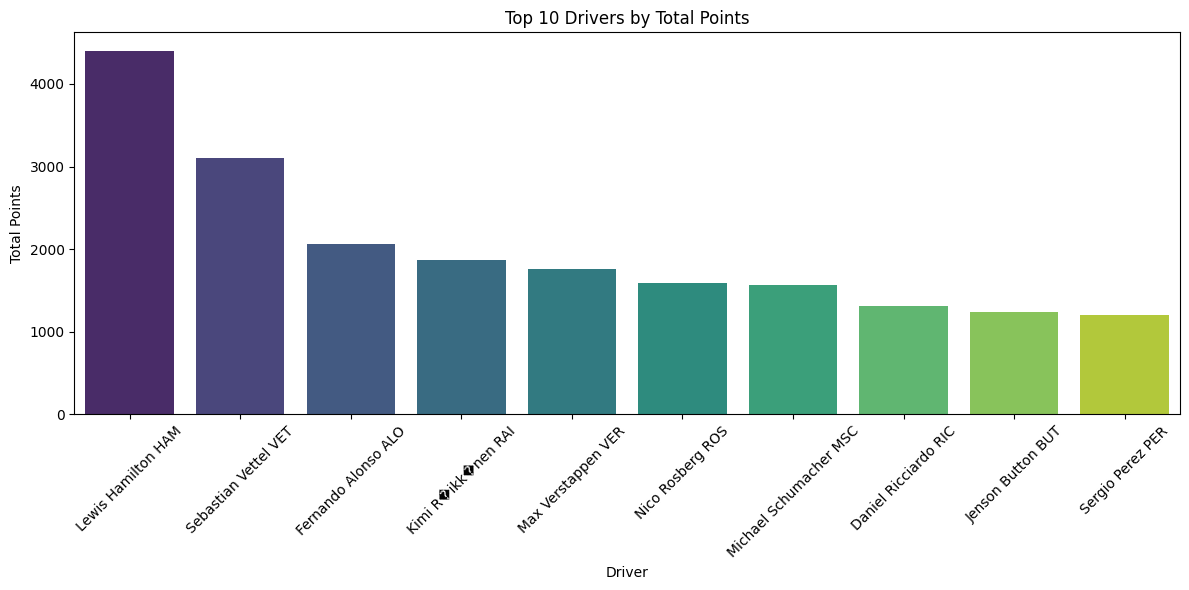

In [39]:
# Your code here to do a first visualization...
plt.figure(figsize=(12, 6))
total_pts = data.groupby('Driver')['PTS'].sum().reset_index()
top_drivers = total_pts.nlargest(10, 'PTS')
sns.barplot(data=top_drivers, x='Driver', y='PTS', palette='viridis')
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Driver')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations #1

Top 10 Drivers by Total Points (Bar Plot):

Lewis Hamilton is the clear leader in terms of total points, with more than 4000 points.
Sebastian Vettel ranks second, followed by Fernando Alonso, both significantly behind Hamilton.
The points gradually decrease from Kimi Räikkönen and Max Verstappen, followed by other drivers like Nico Rosberg, Michael Schumacher, and Daniel Ricciardo.
The overall trend shows a notable gap between the top driver and the others in terms of points accumulated.

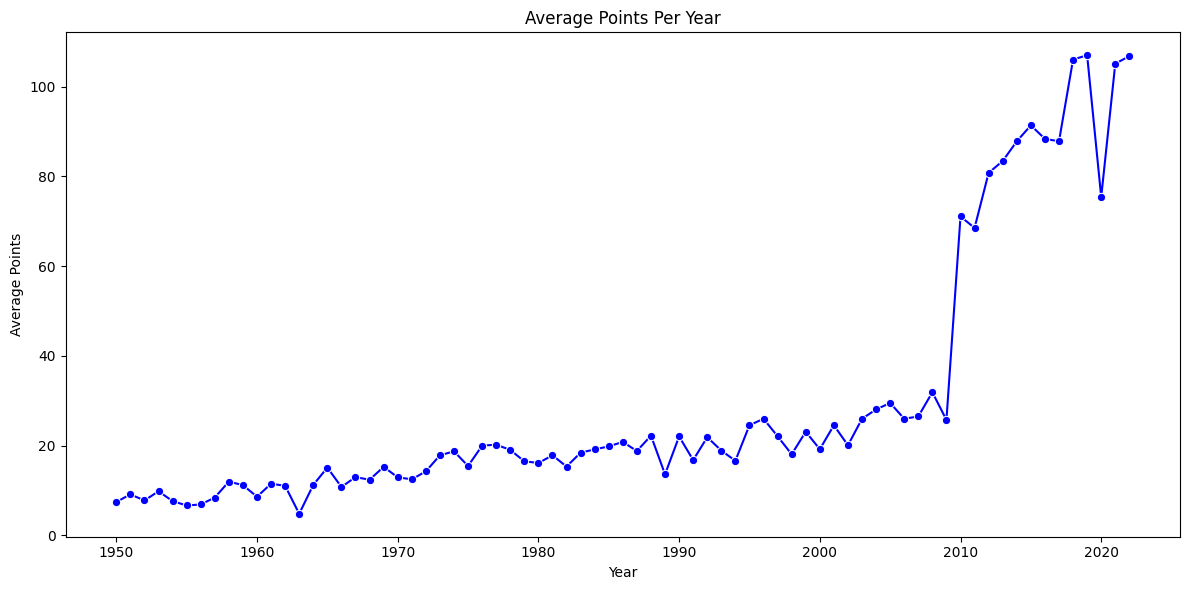

In [40]:
# More code here to do a second visualization...
import seaborn as sns
plt.figure(figsize=(12, 6))
avg_pts_per_year = data.groupby('year')['PTS'].mean().reset_index()
sns.lineplot(data=avg_pts_per_year, x='year', y='PTS', marker='o', color='blue')
plt.title('Average Points Per Year')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.tight_layout()
plt.show()

### Observations #2

Average Points Per Year (Line Plot):

There is a steady increase in average points per year from the 1950s until the 2000s, with minor fluctuations along the way.
A dramatic rise in points can be observed after 2010, likely reflecting changes in the scoring system or race frequency.
Post-2010, the average points per year have more than tripled compared to previous decades, peaking around 2019–2020. There was a slight dip in 2021 but then a recovery in 2022.



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option